# Customer Segmentation and Analysis

Steps to solve the problem :

*   Importing Libraries.
*   Exploration of data.
*   Data Visualization.
*   Clustering using K-Means.
*   Selection of Clusters.
*   Ploting the Cluster Boundry and Clusters.
*   3D Plot of Clusters.



## Importing Libraries

In [42]:
import os 
import numpy as np # for numerical computing in Python
import pandas as pd # for data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

## Data Exploration (_Discover and Visualize the Data to Gain Insights_)

In [43]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [46]:
df.shape

(200, 5)

In [47]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [48]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

[For Style reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [49]:
plt.style.use('fivethirtyeight')

A Distplot or distribution plot, depicts the variation in the data distribution.

### **Histograms**

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

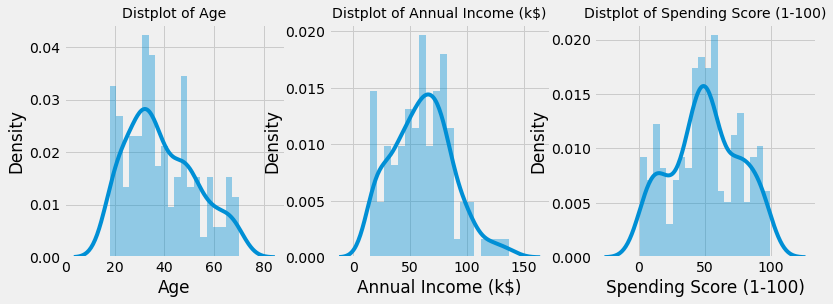

In [50]:
plt.figure(1, figsize=(12, 4))
n = 0
for x in df.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x), fontsize=14)
plt.show()

### **Count Plot of Gender**

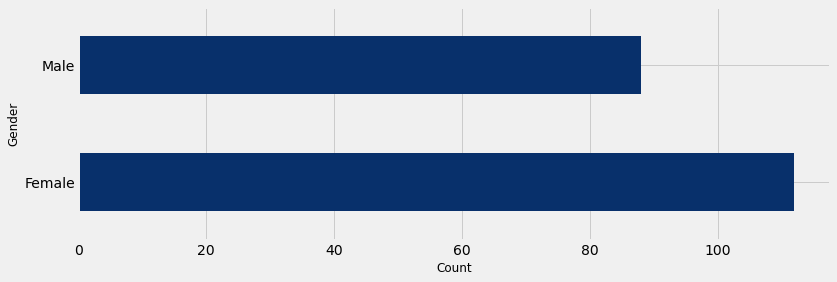

In [51]:
plt.figure(1, figsize=(12, 4))
df['Gender'].value_counts().plot(kind='barh', cmap='Blues_r')
plt.ylabel('Gender', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

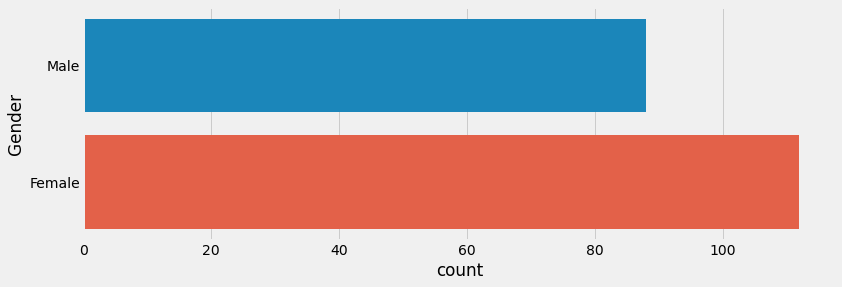

In [52]:
plt.figure(1, figsize=(12, 4))
sns.countplot(y='Gender', data=df)
plt.show()

### **Looking for Correlations**

Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:

In [53]:
corr_matrix = df.corr()

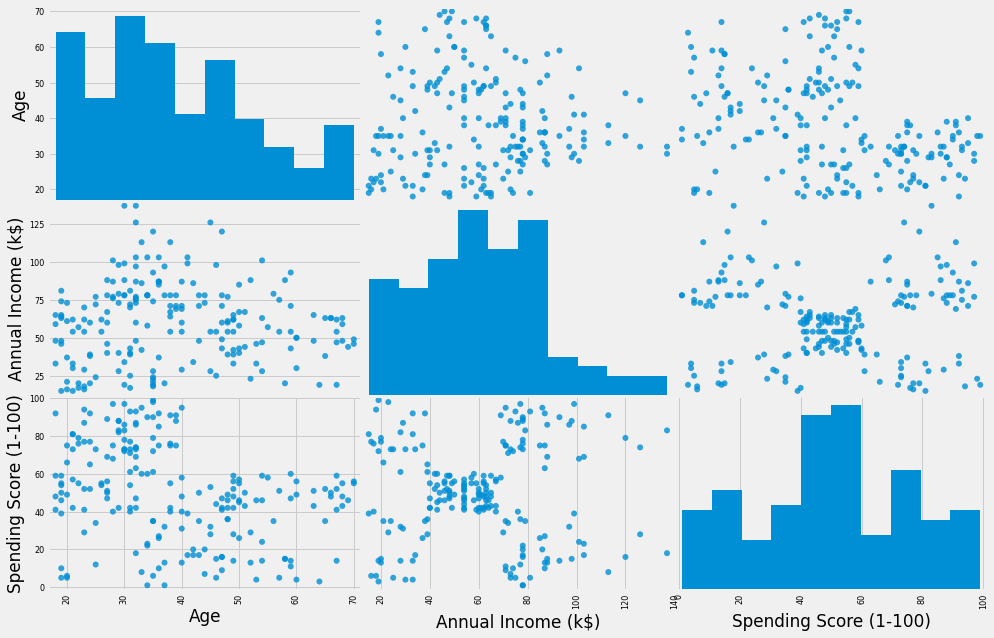

In [54]:
from pandas.plotting import scatter_matrix

attrbutes = df.columns[2:]
scatter_matrix(df[attrbutes], figsize=(15, 10), alpha=0.8, marker='o')
plt.show()

**Ploting the Relation between Age , Annual Income and Spending Score**

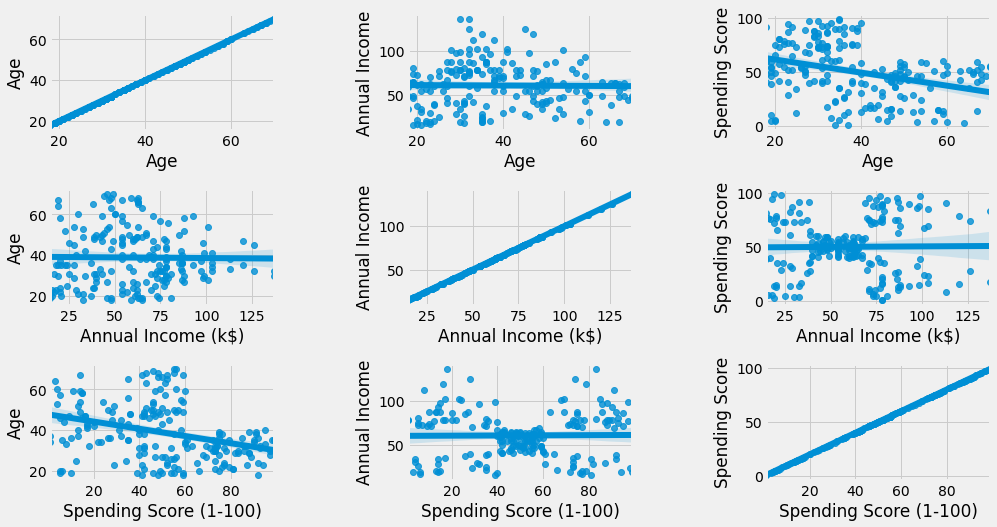

In [55]:
plt.figure(1, figsize=(15, 8))
n = 0
for x in df.columns[2:]:
    for y in df.columns[2:]:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.6)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0]+ ' ' +y.split()[1] if len(y.split())>1 else y)
plt.show()

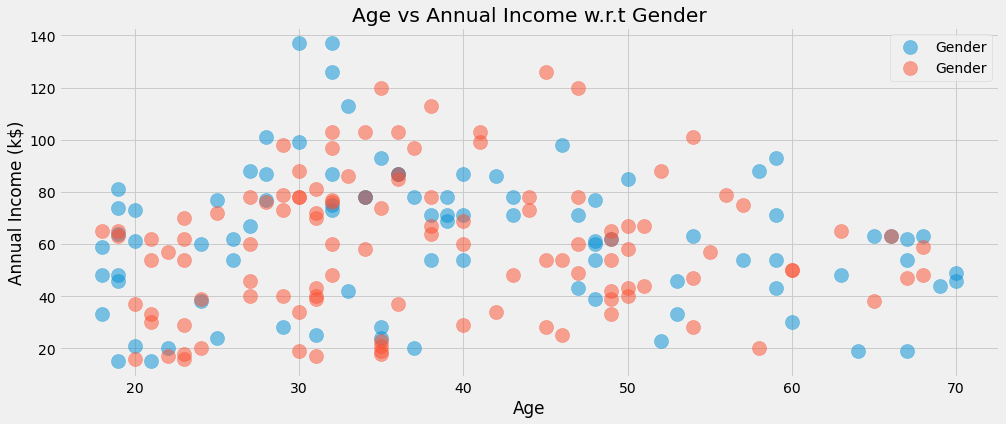

In [56]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
               s=200, alpha=0.5, label='Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

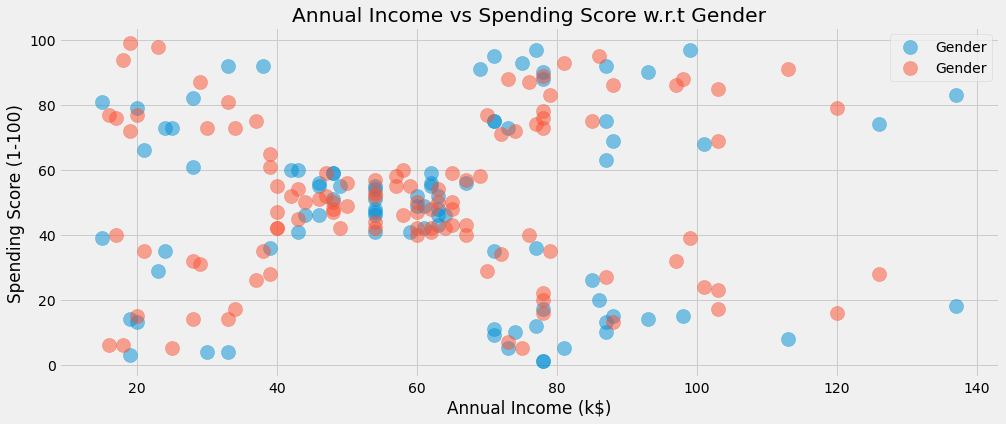

In [57]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df[df['Gender'] == gender],
               s=200, alpha=0.5, label='Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

**Distribution of values in Age , Annual Income and Spending Score according to Gender**

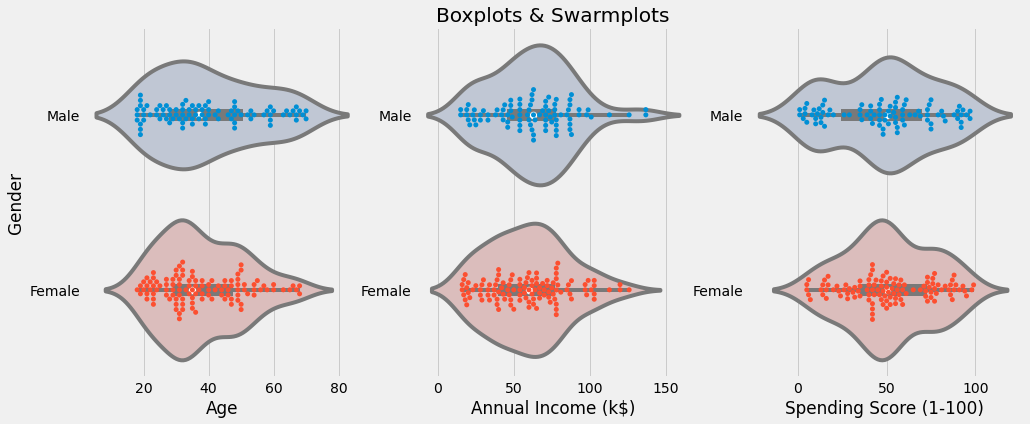

In [58]:
plt.figure(1, figsize=(15, 6))
n = 0
for cols in df.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5)
    sns.violinplot(x = cols, y = 'Gender', data=df, palette='vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using KMeans

#### **Segmentation using Age and Spending Score**

In [59]:
X = df[['Age', 'Spending Score (1-100)']].values
inertias = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, algorithm='elkan', tol=1e-4, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:828: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


Selecting n_clusters based on inertia(mean squared distance between each instance and it's closest centroid)

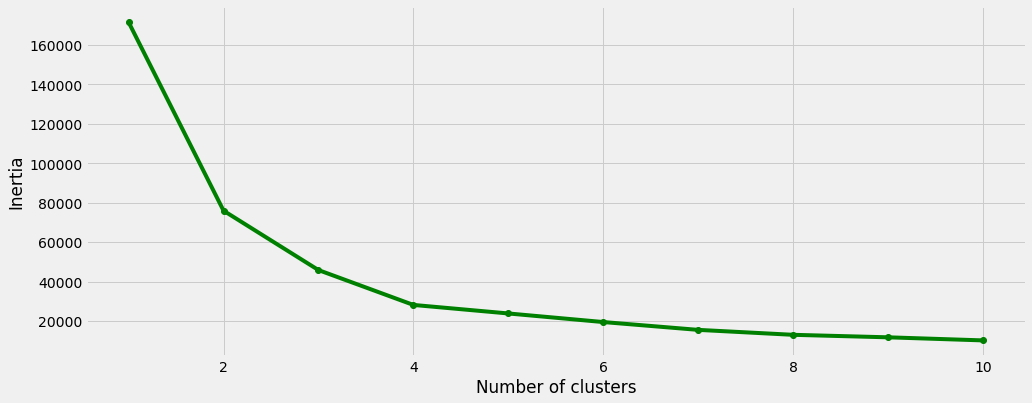

In [60]:
plt.figure(1, figsize=(15, 6))
plt.plot(range(1, 11), inertias, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [61]:
kmeans = KMeans(n_clusters=4, algorithm='elkan', tol=1e-4, random_state=42)
kmeans.fit(X)

KMeans(algorithm='elkan', n_clusters=4, random_state=42)

In [66]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'ko', markersize=5)

def plot_centroids(centroids, circle_color='r', cross_color='w'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8, 
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0],  maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel('Age')
    
    if show_ylabels:
        plt.ylabel('Spending Score (1-100)')

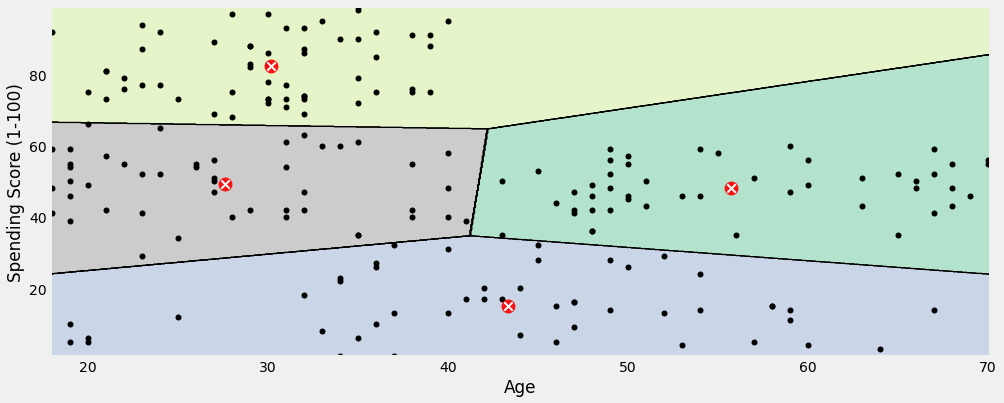

In [67]:
plt.figure(1, figsize=(15, 6))
plot_decision_boundaries(kmeans, X)
plt.show()

#### **Segmentation using Annual Income and Spending Score**

In [69]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
inertias = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, algorithm='elkan', tol=1e-4, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

/home/amit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:828: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


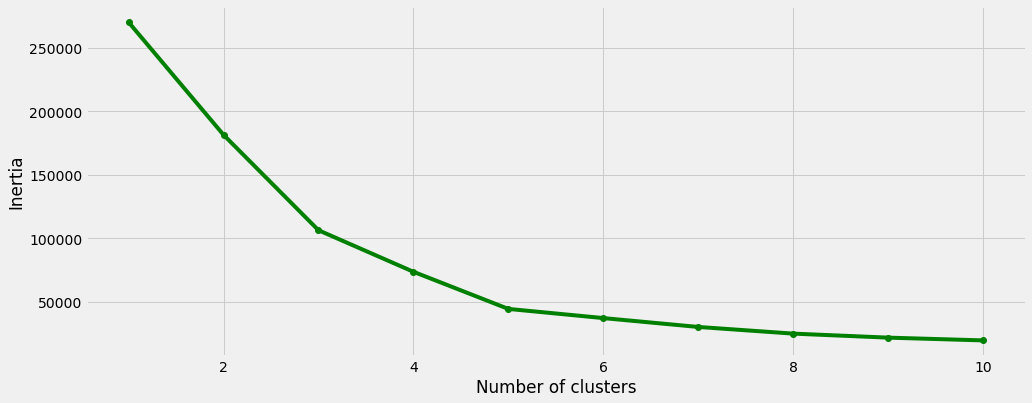

In [70]:
plt.figure(1, figsize=(15, 6))
plt.plot(range(1, 11), inertias, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

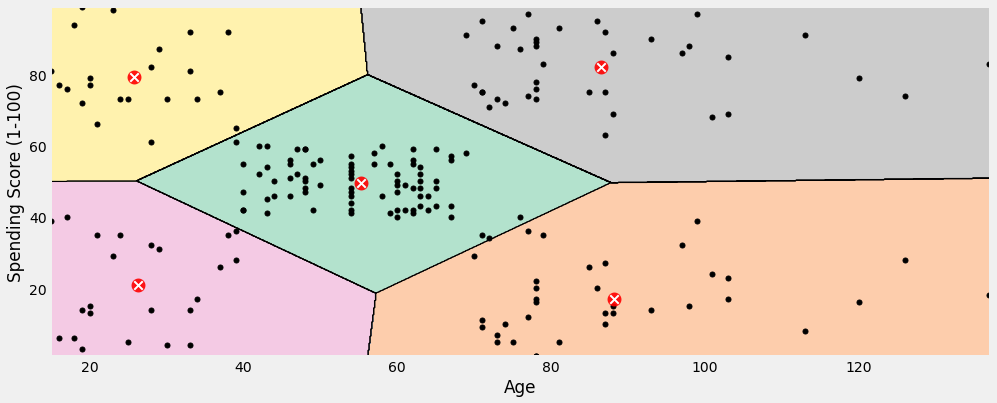

In [72]:
kmeans = KMeans(n_clusters=5, algorithm='elkan', tol=1e-4, random_state=42)
kmeans.fit(X)
plt.figure(1, figsize=(15, 6))
plot_decision_boundaries(kmeans, X)
plt.show()